## **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import zip and upload Fruits dataset**

In [2]:
import zipfile
import os

#Opens the zip file in read mode
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/fruits.zip', 'r') 

#Extracts the files 
zip_ref.extractall() 
zip_ref.close()

## **Import Libraries**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter
from pathlib import Path
import os.path
import random

from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential

from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPool2D, Activation, Dense, Dropout, Flatten, BatchNormalization

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

## **Sample Image**

Shape of Image: (100, 100, 3)


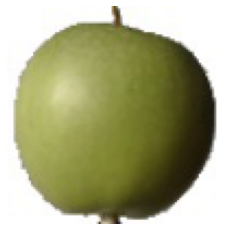

In [4]:
img = load_img('/content/fruits/train/Apple Granny Smith/257_100.jpg')

plt.imshow(img)
plt.axis("off")
print(f'Shape of Image: {img_to_array(img).shape}')
plt.show()

## **File Paths to Train & Test Data**

In [5]:
# Paths to train & test data
train_dir = '/content/fruits/train/'
train_dir_path = Path(train_dir)
train_paths = list(train_dir_path.glob(r'**/*.jpg'))

test_dir = '/content/fruits/test/'
test_dir_path = Path(test_dir)
test_paths = list(test_dir_path.glob(r'**/*.jpg'))

In [6]:
# Classes in train 
print(len(os.listdir('/content/fruits/train/')))

# Classes in test
print(len(os.listdir('/content/fruits/test/')))

90
90


## **Get Train Data**

In [7]:
fru_train = []
fru_img_train = []
for i in os.listdir(train_dir):
  for image_filename in os.listdir(train_dir + i):
    # name of the fruit
    fru_train.append(i)
    # image of the fruit
    fru_img_train.append(i + '/' + image_filename)

filepath_train = pd.Series(train_paths, name='Filepath').astype(str)

In [8]:
# Make train dataframe
train_fruits = pd.DataFrame(fru_train, columns=['Fruits'])
train_fruits['Fruits_Image'] = fru_img_train
train_fruits['Filepath'] = filepath_train

In [9]:
train_fruits.head()

Fruits        Fruits_Image                                  Filepath
0   Kiwi    Kiwi/156_100.jpg    /content/fruits/train/Kiwi/156_100.jpg
1   Kiwi  Kiwi/r_162_100.jpg  /content/fruits/train/Kiwi/r_162_100.jpg
2   Kiwi   Kiwi/r_29_100.jpg   /content/fruits/train/Kiwi/r_29_100.jpg
3   Kiwi    Kiwi/165_100.jpg    /content/fruits/train/Kiwi/165_100.jpg
4   Kiwi    Kiwi/213_100.jpg    /content/fruits/train/Kiwi/213_100.jpg

In [10]:
# Count of train images
print(f'Count of Fruit images in Training set:{train_fruits.shape[0]}')

Count of Fruit images in Training set:46610


In [ ]:
# Save csv: make bar chart Tableau
train_fruits.to_csv('train_fruits.csv')
!cp train_fruits.csv 'drive/My Drive/'

In [11]:
train_fruits.Fruits.value_counts()

Grape Blue            984
Plum 3                900
Strawberry Wedge      738
Melon Piel de Sapo    738
Peach 2               738
                     ... 
Apple Red 3           429
Mango Red             426
Plum 2                420
Mangostan             300
Pear Kaiser           300
Name: Fruits, Length: 90, dtype: int64

In [27]:
# Top 15 train fruits
new_data = Counter(train_fruits["Fruits"])
top_fruits = new_data.most_common(20)

print('The 15 most frequently found fruits in the train data set:')
top_fruits

The 15 most frequently found fruits in the train data set:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Peach 2', 738),
 ('Melon Piel de Sapo', 738),
 ('Strawberry Wedge', 738),
 ('Cherry Rainier', 738),
 ('Pear Stone', 711),
 ('Pear Forelle', 702),
 ('Fig', 702),
 ('Pear 2', 696),
 ('Apple Red Yellow 2', 672),
 ('Pear Red', 666),
 ('Pineapple Mini', 493),
 ('Cherry Wax Red', 492),
 ('Apple Granny Smith', 492),
 ('Pear', 492),
 ('Redcurrant', 492),
 ('Grape Pink', 492),
 ('Grape White 3', 492)]

In [28]:
x, y = zip(*top_fruits)
x, y = list(x), list(y)

In [29]:
top_data = pd.DataFrame(x, columns=['Fruits'])
top_data['Count'] = y
top_data.head()

Fruits  Count
0          Grape Blue    984
1              Plum 3    900
2            Cherry 2    738
3             Peach 2    738
4  Melon Piel de Sapo    738

In [ ]:
# Save csv: make bar chart Tableau
top_data.to_csv('train_fruits_top.csv')
!cp train_fruits_top.csv 'drive/My Drive/'

In [15]:
len(x)

15

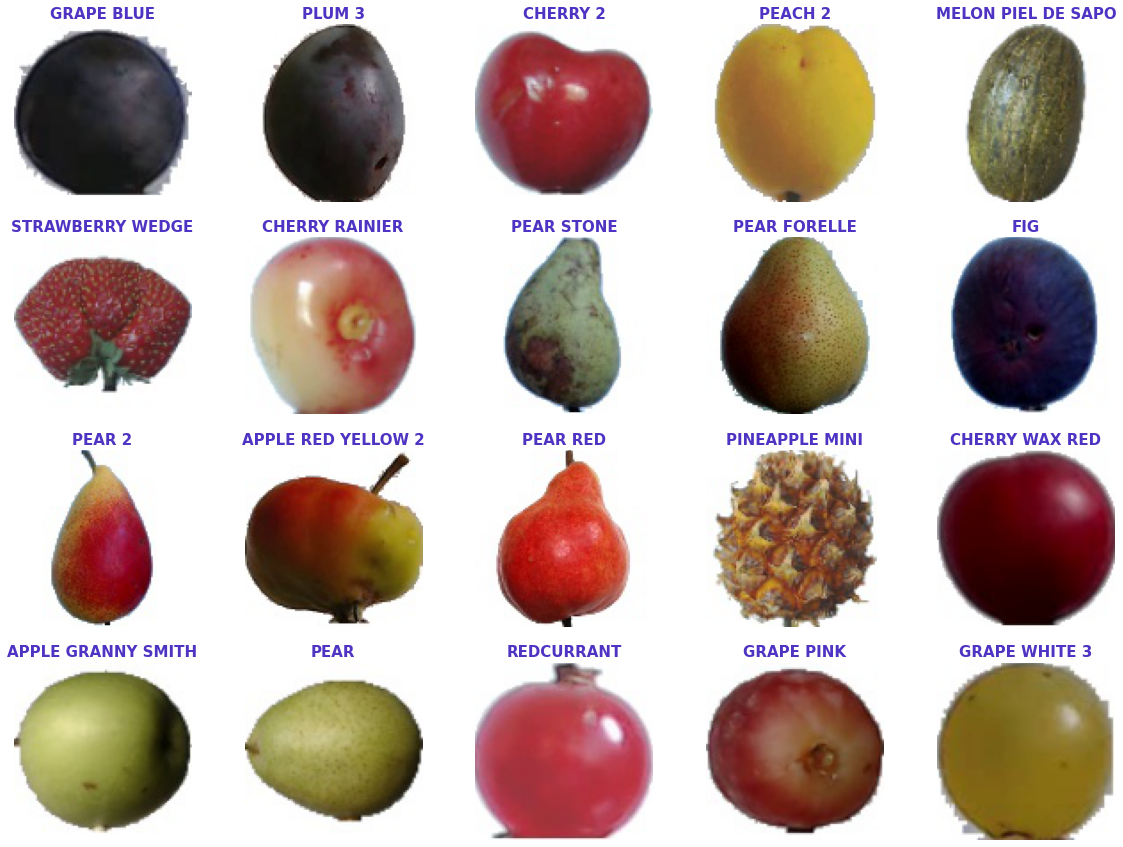

In [40]:
# Visualise top fruits
plt.figure(figsize=(20,15))
tot_fruits = len(x)

for i in range(tot_fruits):
    fruits = train_fruits[train_fruits['Fruits'] == x[i]]['Fruits_Image'].values[1]
    plt.subplot(4,5,i+1)
    img = load_img(train_dir + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "#4F33C3", fontsize = 15 , fontweight = 600)
    plt.axis("off")
    
plt.show()

## **Get Test Data**

In [42]:
fru_test = []
fru_img_test = []
for i in os.listdir(test_dir):
  for image_filename in os.listdir(test_dir + i):
    # name of the fruit
    fru_test.append(i)
    # image of the fruit
    fru_img_test.append(i + '/' + image_filename)

filepath_test = pd.Series(test_paths, name='Filepath').astype(str)

In [43]:
# Make test dataframe
test_fruits = pd.DataFrame(fru_test, columns=['Fruits'])
test_fruits['Fruits_Image'] = fru_img_test
test_fruits['Filepath'] = filepath_test

In [44]:
test_fruits.head()

Fruits       Fruits_Image                                Filepath
0   Kiwi  Kiwi/r_67_100.jpg  /content/fruits/test/Kiwi/r_67_100.jpg
1   Kiwi    Kiwi/46_100.jpg    /content/fruits/test/Kiwi/46_100.jpg
2   Kiwi  Kiwi/r_90_100.jpg  /content/fruits/test/Kiwi/r_90_100.jpg
3   Kiwi    Kiwi/78_100.jpg    /content/fruits/test/Kiwi/78_100.jpg
4   Kiwi    Kiwi/71_100.jpg    /content/fruits/test/Kiwi/71_100.jpg

In [45]:
# Count of test images
print(f'Count of Fruit images in Test set:{test_fruits.shape[0]}')

Count of Fruit images in Test set:15627


In [ ]:
# Save to csv: make bar chart Tableau
test_fruits.to_csv('test_fruits.csv')
!cp test_fruits.csv 'drive/My Drive/'

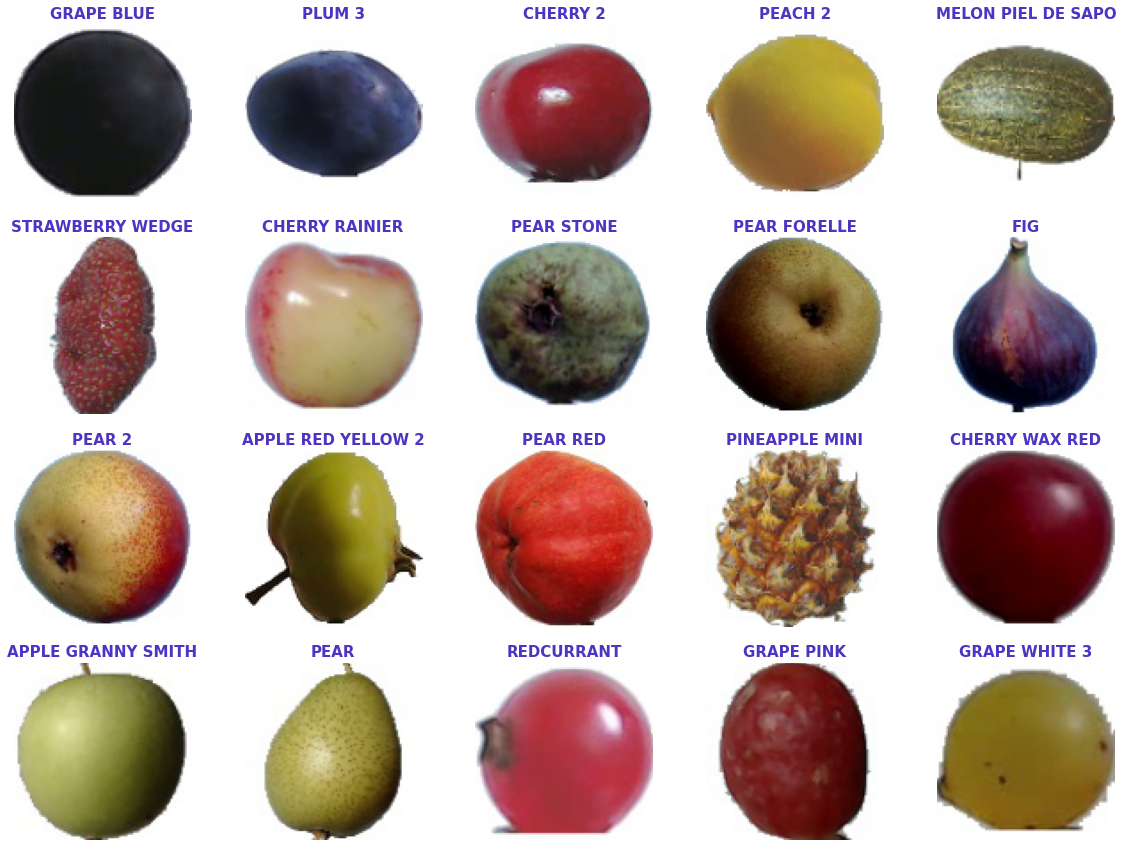

In [46]:
# Visualise top fruits
plt.figure(figsize=(20,15))
tot_fruits = len(x)

for i in range(tot_fruits):
    fruits = test_fruits[test_fruits['Fruits'] == x[i]]['Fruits_Image'].values[1]
    plt.subplot(4,5,i+1)
    img = load_img(test_dir + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "#4F33C3", fontsize = 15 , fontweight = 600)
    plt.axis("off")
    
plt.show()

## **Split Test data into Test and Validation data**

In [49]:
# Copy test dataframe
test_fruits_new = test_fruits.copy()

In [50]:
# Shuffle and split into 60% Test & 40% Validation
test_df, val_df = np.split(test_fruits_new.sample(frac=1, random_state=42), [int(.6 * len(test_fruits_new))])

In [51]:
test_df.shape

(9376, 3)

In [52]:
val_df.shape

(6251, 3)

In [53]:
test_df.head()

Fruits  ...                                        Filepath
511             Pear  ...          /content/fruits/test/Pear/r_45_100.jpg
13852  Grape White 2  ...  /content/fruits/test/Grape White 2/299_100.jpg
1302          Lychee  ...        /content/fruits/test/Lychee/r_43_100.jpg
8481        Pear Red  ...      /content/fruits/test/Pear Red/r_91_100.jpg
13006           Plum  ...          /content/fruits/test/Plum/r_69_100.jpg

[5 rows x 3 columns]

In [54]:
# Count of new test images
print(f'Count of Fruits in new Test set:{test_df.shape[0]}')

# Count of validation images
# Count of test images
print(f'Count of Fruits in Validation set:{val_df.shape[0]}')

Count of Fruits in new Test set:9376
Count of Fruits in Validation set:6251


## **Fruit Classes**

In [ ]:
print(f'Fruits classes in training data: {len(train_fruits.Fruits.unique())}')


Fruits classes in training data: 90


In [ ]:
print(f'Fruits classes in test data: {len(test_df.Fruits.unique())}')

Fruits classes in test data: 90


In [ ]:
print(f'Fruits classes in validation data: {len(val_df.Fruits.unique())}')

Fruits classes in validation data: 90


In [ ]:
fruit_classes = list(test_df.Fruits)
print(fruit_classes)

['Quince', 'Pear 2', 'Apple Red 1', 'Pomegranate', 'Grape Blue', 'Apple Red Yellow 1', 'Pear Monster', 'Kiwi', 'Cantaloupe 1', 'Grape Pink', 'Cantaloupe 2', 'Orange', 'Plum 3', 'Apricot', 'Apple Red Delicious', 'Grape White 4', 'Huckleberry', 'Grapefruit Pink', 'Apple Granny Smith', 'Pineapple Mini', 'Lychee', 'Pear', 'Peach 2', 'Banana', 'Pear Forelle', 'Mangostan', 'Melon Piel de Sapo', 'Banana', 'Quince', 'Physalis', 'Cactus fruit', 'Mangostan', 'Orange', 'Apple Granny Smith', 'Orange', 'Maracuja', 'Pitahaya Red', 'Pomelo Sweetie', 'Strawberry', 'Lemon Meyer', 'Pear Monster', 'Cherry 2', 'Tamarillo', 'Plum 3', 'Blueberry', 'Pear Monster', 'Apple Red 3', 'Huckleberry', 'Lemon Meyer', 'Pear Red', 'Cantaloupe 1', 'Plum 3', 'Kaki', 'Guava', 'Cactus fruit', 'Melon Piel de Sapo', 'Cherry Wax Red', 'Tamarillo', 'Pear', 'Limes', 'Lychee', 'Huckleberry', 'Kaki', 'Grapefruit Pink', 'Pear 2', 'Limes', 'Grape Pink', 'Pear Williams', 'Mango', 'Rambutan', 'Quince', 'Clementine', 'Lychee', 'Pear W

# **MODEL1: Custom Model**

## **Data Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe= train_fruits, x_col='Filepath', y_col='Fruits', target_size= (100, 100), color_mode= 'rgb', class_mode= 'categorical', batch_size=15, seed=123)

val_generator = val_datagen.flow_from_dataframe(dataframe= val_df, x_col='Filepath', y_col='Fruits', target_size= (100, 100), color_mode= 'rgb', class_mode= 'categorical', batch_size=15, seed=123)

test_generator = test_datagen.flow_from_dataframe(dataframe= test_df, x_col= 'Filepath', y_col= 'Fruits', target_size= (100, 100), color_mode= 'rgb', class_mode= 'categorical', batch_size=15, seed=123, shuffle=False)


Found 46610 validated image filenames belonging to 90 classes.
Found 6251 validated image filenames belonging to 90 classes.
Found 9376 validated image filenames belonging to 90 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print(f'data_batch shape: {data_batch.shape}')
    print(f'labels_batch shape: {labels_batch.shape}')
    break

data_batch shape: (15, 100, 100, 3)
labels_batch shape: (15, 90)


## **Create Model**

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), padding='same', activation = 'relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size = (3,3), padding='same', activation = 'relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size = (3,3), padding='same', activation = 'relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), padding='same', activation = 'relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (3,3), padding='same', activation = 'relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(90, activation = 'softmax')) # output

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 32)       

## **Compile Model**

In [ ]:
# optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## **Fit Model**

In [ ]:
%%time

history = model.fit(train_generator, steps_per_epoch = 1600 // 16, epochs= 150, validation_data= val_generator, validation_steps = 800 // 16, verbose = 1)

Epoch 1/150
100/100 [==============================] - 8s 69ms/step - loss: 4.7447 - accuracy: 0.0467 - val_loss: 5.5197 - val_accuracy: 0.0227
Epoch 2/150
100/100 [==============================] - 7s 66ms/step - loss: 3.7781 - accuracy: 0.1220 - val_loss: 8.7800 - val_accuracy: 0.0080
Epoch 3/150
100/100 [==============================] - 7s 67ms/step - loss: 3.3511 - accuracy: 0.1820 - val_loss: 5.2777 - val_accuracy: 0.0240
Epoch 4/150
100/100 [==============================] - 7s 66ms/step - loss: 3.0299 - accuracy: 0.2320 - val_loss: 4.0920 - val_accuracy: 0.1653
Epoch 5/150
100/100 [==============================] - 7s 66ms/step - loss: 2.4978 - accuracy: 0.3407 - val_loss: 2.0301 - val_accuracy: 0.4093
Epoch 6/150
100/100 [==============================] - 7s 66ms/step - loss: 2.3906 - accuracy: 0.3467 - val_loss: 1.7089 - val_accuracy: 0.4867
Epoch 7/150
100/100 [==============================] - 7s 67ms/step - loss: 2.0716 - accuracy: 0.4300 - val_loss: 1.6564 - val_accuracy:

In [ ]:
print(f'Training accuracy:{history.history["accuracy"][-1]:.3f} validation accuracy:{history.history["val_accuracy"][-1]:.3f} ')

Training accuracy:0.947 validation accuracy:0.975 


## **Evaluate on Test data**

In [ ]:
step_test=test_generator.n//test_generator.batch_size
step_test

625

In [ ]:
score = model.evaluate(test_generator, steps=step_test)
print(f'''
Test loss:{score[0]:.3f}
Test Accuracy: {score[1]:.3f}''')

625/625 [==============================] - 9s 15ms/step - loss: 0.0476 - accuracy: 0.9854

Test loss:0.048
Test Accuracy: 0.985


## **Save Models & Weights**

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/model_df.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/model_df.h5")

## **View Accuracy & Losses**

In [ ]:
# sns.set_style("whitegrid")
# sns.set_style({'font.family':'sans-serif', 'font.serif':['Helvetica Neue'], 'font.size': 15,
#                 'axes.axisbelow': True, 'axes.facecolor': 'white', 'axes.grid': True, 'grid.color': 'lightgrey', 
#                'grid.linestyle': '--', 'xtick.color': '.20', 'ytick.color': '.20', 'axes.labelcolor': '.10', 'axes.linewidth': 0.2})

# fig, axes = plt.subplots(1, 2, figsize=(20,8))
# fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# axes[0].plot(history.history['accuracy'], color='#4F33C3', linewidth=2.5)
# axes[0].plot(history.history['val_accuracy'], color='#4F33C3', linewidth=1.3, linestyle='--')
# axes[0].set_xlabel('EPOCHS', fontsize=12, color='#4F33C3', fontweight='bold')
# axes[0].set_ylabel('ACCURACY', fontsize=12, color='#4F33C3', fontweight='bold')
# axes[0].legend(['Train','Validation'], fontsize=12)
# axes[0].set_title('Model accuracy')
# axes[0].grid(True)

# axes[1].plot(history.history['loss'], color='#4F33C3', linewidth=2.5)
# axes[1].plot(history.history['val_loss'], color='#4F33C3', linewidth=1.3, linestyle='--')
# axes[1].set_xlabel('EPOCHS', fontsize=12, color='#4F33C3', fontweight='bold')
# axes[1].set_ylabel('LOSS', fontsize=12, color='#4F33C3', fontweight='bold')
# axes[1].legend(['Train','Validation'], fontsize=12)
# axes[1].set_title('Model loss')
# axes[1].grid(True)

# sns.despine(left=True, bottom=True)
# plt.show()

In [ ]:
def model_plot(model_fit, start_epoch):
    #Plot the training and validation data
    tacc=model_fit.history['accuracy']
    tloss=model_fit.history['loss']
    vacc=model_fit.history['val_accuracy']
    vloss=model_fit.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]

    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)  

    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)

    sns.set_style("whitegrid")
    sns.set_style({'font.family':'sans-serif', 'font.serif':['Helvetica Neue'], 'font.size': 15,
                'axes.axisbelow': True, 'axes.facecolor': 'white', 'axes.grid': True, 'grid.color': 'lightgrey', 
               'grid.linestyle': '--', 'xtick.color': '.20', 'ytick.color': '.20', 'axes.labelcolor': '.10', 'axes.linewidth': 0.2})
    
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    axes[0].plot(Epochs,tloss, label='Training loss', color='#4F33C3', linewidth=2.5)
    axes[0].plot(Epochs,vloss, label='Validation loss', color='#4F33C3', linewidth=1.3, linestyle='--')
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'red', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('EPOCHS', fontsize=12, color='#4F33C3', fontweight='bold')
    axes[0].set_ylabel('LOSS', fontsize=12, color='#4F33C3', fontweight='bold')
    axes[0].legend(fontsize=12)
    axes[0].grid(True)

    axes[1].plot (Epochs,tacc, label= 'Training Accuracy', color='#4F33C3', linewidth=2.5)
    axes[1].plot (Epochs,vacc, label= 'Validation Accuracy', color='#4F33C3', linewidth=1.3, linestyle='--')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'red', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('EPOCHS', fontsize=12, color='#4F33C3', fontweight='bold')
    axes[1].set_ylabel('ACCURACY', fontsize=12, color='#4F33C3', fontweight='bold')
    axes[1].legend(fontsize=12)
    axes[0].grid(True)

    sns.despine(left=True, bottom=True)

    plt.show()

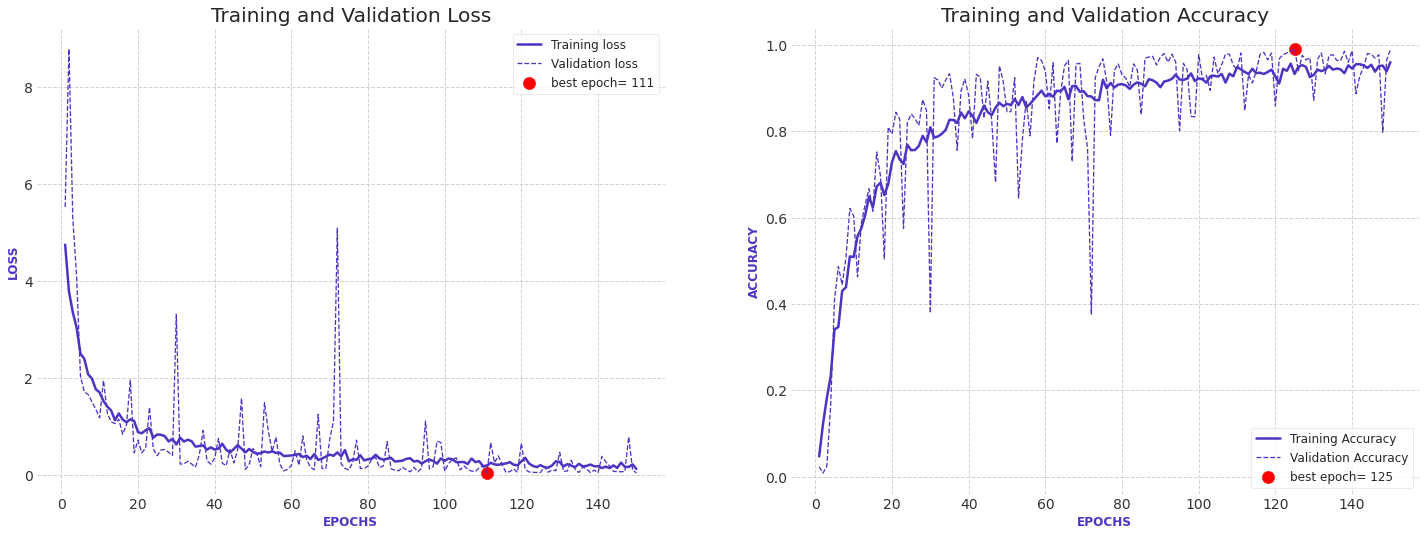

In [ ]:
model_plot(history, 0)

## **Predict on Test Data**

In [ ]:
# Predict the label of the test data
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['Tamarillo', 'Apple Golden 3', 'Passion Fruit', 'Grape White 2', 'Apple Red Yellow 2']


In [ ]:
y_test = list(test_df.Fruits)
report = classification_report(y_test, pred, zero_division=1)
print(report)

                     precision    recall  f1-score   support

     Apple Braeburn       0.91      1.00      0.95        88
 Apple Crimson Snow       1.00      0.77      0.87        95
     Apple Golden 1       1.00      0.99      1.00       102
     Apple Golden 2       1.00      1.00      1.00       100
     Apple Golden 3       0.89      1.00      0.94        96
 Apple Granny Smith       1.00      0.91      0.95        97
    Apple Pink Lady       0.80      1.00      0.89        82
        Apple Red 1       1.00      0.81      0.90        96
        Apple Red 2       0.93      1.00      0.96        89
        Apple Red 3       0.89      1.00      0.94        91
Apple Red Delicious       1.00      1.00      1.00       103
 Apple Red Yellow 1       1.00      1.00      1.00       100
 Apple Red Yellow 2       1.00      1.00      1.00       124
            Apricot       0.80      1.00      0.89        94
             Banana       1.00      1.00      1.00       111
 Banana Lady Finger    

In [ ]:
# Make classification report dataframe
report_csv = classification_report(y_test, pred, zero_division=1, output_dict=True)
print(report_csv)

{'Apple Braeburn': {'precision': 0.9072164948453608, 'recall': 1.0, 'f1-score': 0.9513513513513514, 'support': 88}, 'Apple Crimson Snow': {'precision': 1.0, 'recall': 0.7684210526315789, 'f1-score': 0.869047619047619, 'support': 95}, 'Apple Golden 1': {'precision': 1.0, 'recall': 0.9901960784313726, 'f1-score': 0.9950738916256158, 'support': 102}, 'Apple Golden 2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 100}, 'Apple Golden 3': {'precision': 0.8888888888888888, 'recall': 1.0, 'f1-score': 0.9411764705882353, 'support': 96}, 'Apple Granny Smith': {'precision': 1.0, 'recall': 0.9072164948453608, 'f1-score': 0.9513513513513514, 'support': 97}, 'Apple Pink Lady': {'precision': 0.803921568627451, 'recall': 1.0, 'f1-score': 0.891304347826087, 'support': 82}, 'Apple Red 1': {'precision': 1.0, 'recall': 0.8125, 'f1-score': 0.896551724137931, 'support': 96}, 'Apple Red 2': {'precision': 0.9270833333333334, 'recall': 1.0, 'f1-score': 0.9621621621621621, 'support': 89}, 'Appl

In [ ]:
report_df = pd.DataFrame(report_csv).transpose()

In [ ]:
report_df.head()

precision    recall  f1-score  support
Apple Braeburn       0.907216  1.000000  0.951351     88.0
Apple Crimson Snow   1.000000  0.768421  0.869048     95.0
Apple Golden 1       1.000000  0.990196  0.995074    102.0
Apple Golden 2       1.000000  1.000000  1.000000    100.0
Apple Golden 3       0.888889  1.000000  0.941176     96.0

In [ ]:
report_df.to_csv('class_report.csv')
!cp class_report.csv 'drive/My Drive/'

## **Visualise the Predictions**

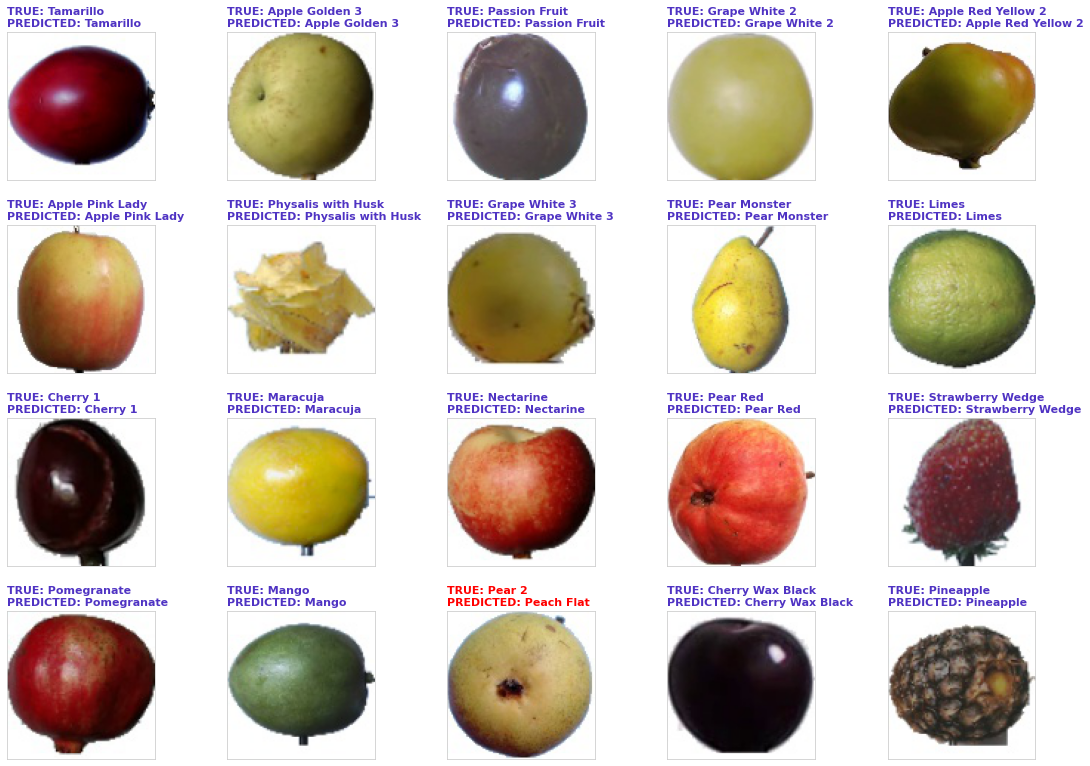

In [ ]:
# Display 20 picture of the dataset with their labels
sns.set_style("whitegrid")
sns.set_style({'font.family':'sans-serif', 'font.serif':['Helvetica Neue'], 'font.size': 15,
                'axes.axisbelow': True, 'axes.facecolor': 'white', 'axes.grid': True, 'grid.color': 'lightgrey', 
               'grid.linestyle': '--', 'xtick.color': '.20', 'ytick.color': '.20', 'axes.labelcolor': '.10', 'axes.linewidth': 0.2})

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 11), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"TRUE: {test_df.Fruits.iloc[i].split('_')[0]}\nPREDICTED: {pred[i].split('_')[0]}", 
                 fontsize = 11, color=('#4F33C3' if test_df.Fruits.iloc[i].split('_')[0] == pred[i].split('_')[0] else 'red'), fontweight ='bold', loc='left')
    
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=0.2)
plt.show()

# **MODEL2: Transfer Learning with Inception ResNet V2**

## **Data Augmentation**

In [47]:
train_datagen_1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
val_datagen_1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
test_datagen_1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [55]:
train_generator_1 = train_datagen_1.flow_from_dataframe(dataframe= train_fruits, x_col='Filepath', y_col='Fruits', target_size= (224, 224), color_mode= 'rgb', class_mode= 'categorical', batch_size=15, seed=123)

val_generator_1 = val_datagen_1.flow_from_dataframe(dataframe= val_df, x_col='Filepath', y_col='Fruits', target_size= (224, 224), color_mode= 'rgb', class_mode= 'categorical', batch_size=15, seed=123)

test_generator_1 = test_datagen_1.flow_from_dataframe(dataframe= test_df, x_col= 'Filepath', y_col= 'Fruits', target_size= (224, 224), color_mode= 'rgb', class_mode= 'categorical', batch_size=15, seed=123, shuffle=False)


Found 46610 validated image filenames belonging to 90 classes.
Found 6251 validated image filenames belonging to 90 classes.
Found 9376 validated image filenames belonging to 90 classes.


In [56]:
for data_batch, labels_batch in train_generator_1:
    print(f'data_batch shape: {data_batch.shape}')
    print(f'labels_batch shape: {labels_batch.shape}')
    break

data_batch shape: (15, 224, 224, 3)
labels_batch shape: (15, 90)


## **Create Model**

In [57]:
base_model1 = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet",input_shape=(224, 224, 3), pooling='max') 
base_model1.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
print(base_model1.summary())

In [ ]:
input = base_model1.input
class1 = tf.keras.layers.Dense(250, activation='relu')(base_model1.output)
class2 = tf.keras.layers.Dense(250, activation='relu')(class1)
drop1 = Dropout(rate=.5, seed=123)(class2) 
output = tf.keras.layers.Dense(90, activation='softmax')(drop1)

model1 = tf.keras.Model(inputs=input, outputs=output)

In [ ]:
# def create_model(base_model):
#   base_model.trainable = True
#   input = base_model.input
#   class1 = tf.keras.layers.Dense(250, activation='relu')(base_model.output)
#   drop1 = Dropout(rate=0.5, seed=123)(class1)
#   output = tf.keras.layers.Dense(90, activation='softmax')(drop1)

#   model = tf.keras.Model(inputs=input, outputs=output)

#   model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])

#   return model

## **Compile Model**

In [ ]:
# optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## **Fit Model**

In [ ]:
%%time

history1 = model1.fit(train_generator_1, epochs= 10, validation_data= val_generator_1, verbose = 1)

Epoch 1/10
3108/3108 [==============================] - 1767s 567ms/step - loss: 0.6122 - accuracy: 0.8303 - val_loss: 0.1655 - val_accuracy: 0.9531
Epoch 2/10
3108/3108 [==============================] - 1527s 491ms/step - loss: 0.1284 - accuracy: 0.9613 - val_loss: 0.1322 - val_accuracy: 0.9634
Epoch 3/10
3108/3108 [==============================] - 1511s 486ms/step - loss: 0.1105 - accuracy: 0.9702 - val_loss: 0.1965 - val_accuracy: 0.9611
Epoch 4/10
3108/3108 [==============================] - 1497s 482ms/step - loss: 0.1021 - accuracy: 0.9753 - val_loss: 0.1610 - val_accuracy: 0.9701
Epoch 5/10
3108/3108 [==============================] - 1494s 481ms/step - loss: 0.0926 - accuracy: 0.9796 - val_loss: 0.3097 - val_accuracy: 0.9504
Epoch 6/10
3108/3108 [==============================] - 1493s 481ms/step - loss: 0.1028 - accuracy: 0.9803 - val_loss: 0.3418 - val_accuracy: 0.9573
Epoch 7/10
3108/3108 [==============================] - 1508s 485ms/step - loss: 0.0948 - accuracy: 0.9837

## **Evaluate on Test data**

In [ ]:
step_test=test_generator_1.n//test_generator_1.batch_size
step_test

625

In [ ]:
score1 = model1.evaluate(test_generator_1, steps=step_test)
print(f'''
Test loss:{score1[0]:.3f}
Test Accuracy: {score1[1]:.3f}''')

625/625 [==============================] - 291s 465ms/step - loss: 0.4102 - accuracy: 0.9630

Test loss:0.410
Test Accuracy: 0.963


## **Save Models & Weights**

In [ ]:
# serialize model to JSON
model_json1 = model1.to_json()
with open("/content/drive/MyDrive/model1.json", "w") as json_file:
    json_file.write(model_json1)

# save model in HDF5
model1.save('/content/drive/MyDrive/model1.h5')

# serialize weights to HDF5
model1.save_weights("/content/drive/MyDrive/model_weights1.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


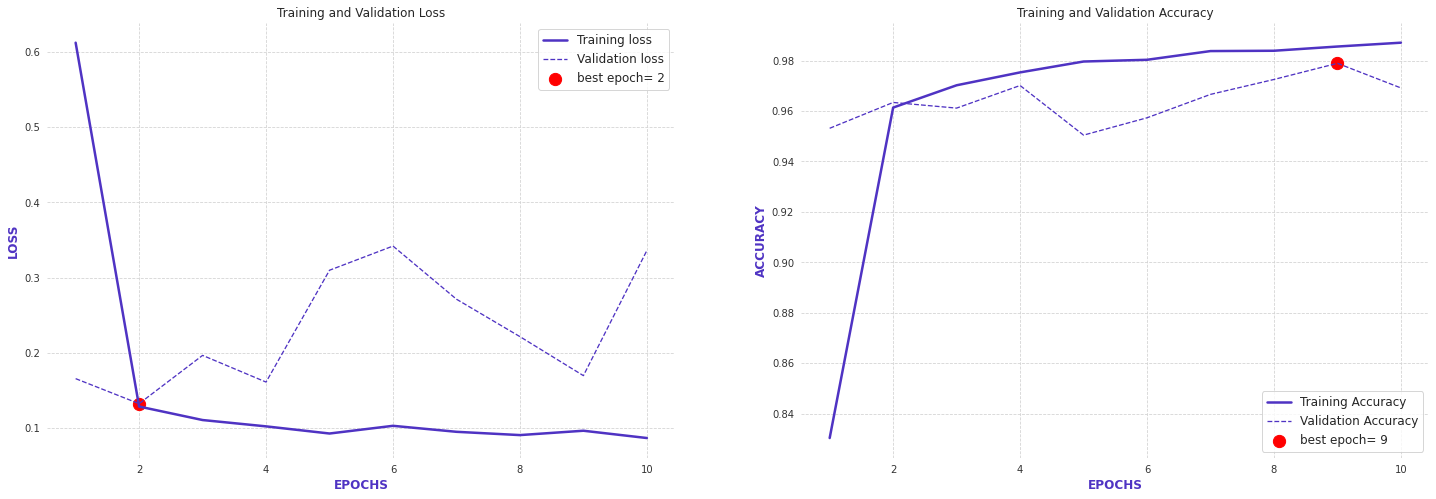

In [ ]:
model_plot(history1, 0)

In [ ]:
# Predict the label of the test data
pred1 = model1.predict(test_generator_1)
pred1 = np.argmax(pred1,axis=1)

# Map the label
labels = (train_generator_1.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred1]

# Display the result
print(f'The first 5 predictions: {pred1[:5]}')

The first 5 predictions: ['Quince', 'Pear 2', 'Apple Red 3', 'Pomegranate', 'Grape Blue']


In [ ]:
y_test1 = list(test_df.Fruits)
report1 = classification_report(y_test1, pred1, zero_division=1)
print(report1)

                     precision    recall  f1-score   support

     Apple Braeburn       0.88      0.95      0.91       111
 Apple Crimson Snow       0.79      0.91      0.85        81
     Apple Golden 1       1.00      1.00      1.00       107
     Apple Golden 2       1.00      0.79      0.88       106
     Apple Golden 3       0.76      0.99      0.86       101
 Apple Granny Smith       1.00      0.90      0.95        99
    Apple Pink Lady       0.94      0.98      0.96        90
        Apple Red 1       0.94      0.69      0.80        95
        Apple Red 2       0.77      0.75      0.76       100
        Apple Red 3       0.66      1.00      0.80        85
Apple Red Delicious       1.00      1.00      1.00       104
 Apple Red Yellow 1       1.00      0.71      0.83        94
 Apple Red Yellow 2       0.97      1.00      0.99       134
            Apricot       0.81      1.00      0.89       105
             Banana       0.99      1.00      0.99        99
 Banana Lady Finger    

In [ ]:
# Make classification report dataframe
report_csv1 = classification_report(y_test1, pred1, zero_division=1, output_dict=True)
print(report_csv1)

{'Apple Braeburn': {'precision': 0.8760330578512396, 'recall': 0.954954954954955, 'f1-score': 0.9137931034482758, 'support': 111}, 'Apple Crimson Snow': {'precision': 0.7872340425531915, 'recall': 0.9135802469135802, 'f1-score': 0.8457142857142856, 'support': 81}, 'Apple Golden 1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 107}, 'Apple Golden 2': {'precision': 1.0, 'recall': 0.7924528301886793, 'f1-score': 0.8842105263157896, 'support': 106}, 'Apple Golden 3': {'precision': 0.7633587786259542, 'recall': 0.9900990099009901, 'f1-score': 0.8620689655172414, 'support': 101}, 'Apple Granny Smith': {'precision': 1.0, 'recall': 0.898989898989899, 'f1-score': 0.9468085106382979, 'support': 99}, 'Apple Pink Lady': {'precision': 0.9361702127659575, 'recall': 0.9777777777777777, 'f1-score': 0.9565217391304347, 'support': 90}, 'Apple Red 1': {'precision': 0.9428571428571428, 'recall': 0.6947368421052632, 'f1-score': 0.7999999999999999, 'support': 95}, 'Apple Red 2': {'precision

In [ ]:
report_df1 = pd.DataFrame(report_csv1).transpose()

In [ ]:
report_df1.head()

precision    recall  f1-score  support
Apple Braeburn       0.876033  0.954955  0.913793    111.0
Apple Crimson Snow   0.787234  0.913580  0.845714     81.0
Apple Golden 1       1.000000  1.000000  1.000000    107.0
Apple Golden 2       1.000000  0.792453  0.884211    106.0
Apple Golden 3       0.763359  0.990099  0.862069    101.0

In [ ]:
report_df1.to_csv('class_report1.csv')
!cp class_report1.csv 'drive/My Drive/'

## **Visualise the Predictions**

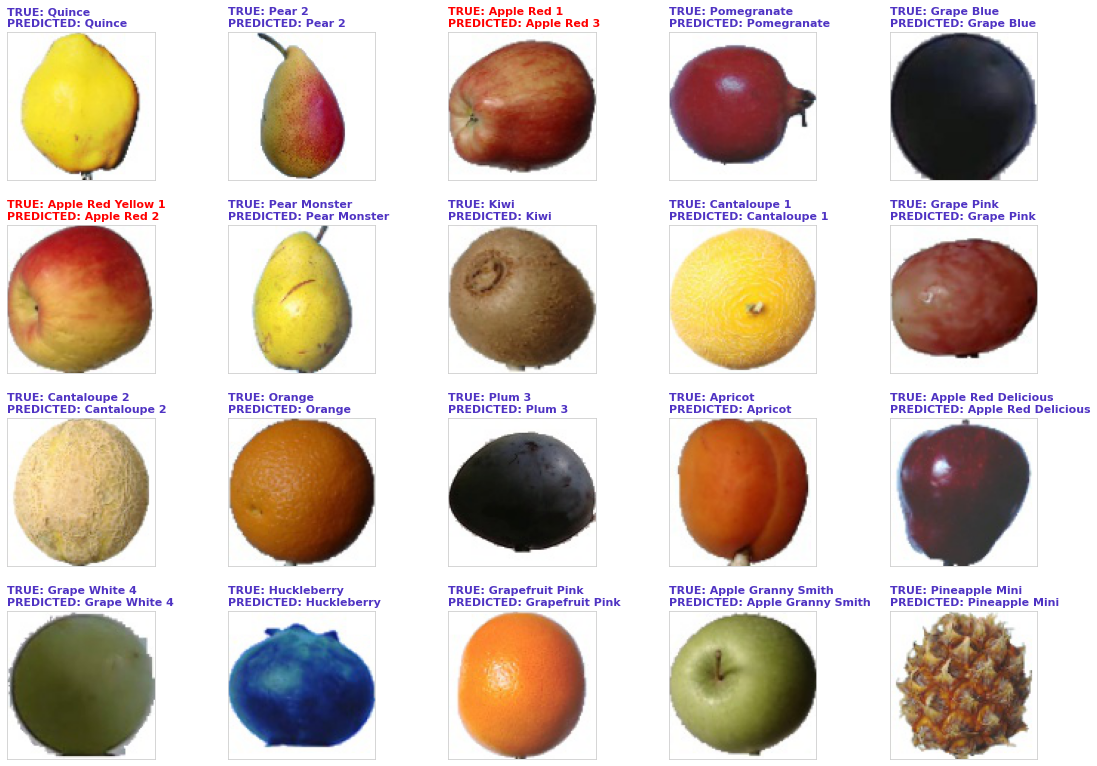

In [ ]:
# Display 20 picture of the dataset with their labels
sns.set_style("whitegrid")
sns.set_style({'font.family':'sans-serif', 'font.serif':['Helvetica Neue'], 'font.size': 15,
                'axes.axisbelow': True, 'axes.facecolor': 'white', 'axes.grid': True, 'grid.color': 'lightgrey', 
               'grid.linestyle': '--', 'xtick.color': '.20', 'ytick.color': '.20', 'axes.labelcolor': '.10', 'axes.linewidth': 0.2})

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 11), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"TRUE: {test_df.Fruits.iloc[i].split('_')[0]}\nPREDICTED: {pred1[i].split('_')[0]}", 
                 fontsize = 11, color=('#4F33C3' if test_df.Fruits.iloc[i].split('_')[0] == pred1[i].split('_')[0] else 'red'), fontweight ='bold', loc='left')
    
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=0.2)
plt.show()